In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy import mean

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import datetime
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources\hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

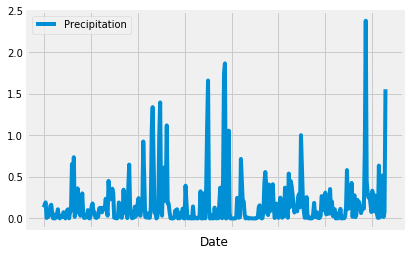

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
base_date = datetime.datetime.strptime("2017-08-23", "%Y-%m-%d")

# Calculate the date 1 year ago from the last data point in the database
numdays = 365

date_list = [base_date - datetime.timedelta(days=x) for x in range(0, numdays)]
str_dates = []
for date in date_list:
    new_date = date.strftime("%Y-%m-%d")
    str_dates.append(new_date)
    
# Perform a query to retrieve the data and precipitation scores
prcp_results = session.query(func.avg(Measurement.prcp), Measurement.date)\
               .filter(Measurement.date.in_(str_dates))\
               .group_by(Measurement.date)
prcp_data = []
for res in prcp_results:
    prcp_data.append(res[0])
    
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame([str_dates[::-1], prcp_data[::-1]]).T
prcp_df.rename(columns={0: "Date", 1: "Precipitation"}, inplace=True)
prcp_df.set_index("Date", inplace=True)
#prcp_df.head

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.savefig("Images/precipitation.png")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df["Precipitation"].describe()

count     365.0
unique    231.0
top         0.0
freq       48.0
Name: Precipitation, dtype: float64

In [13]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(Station.station))
station_count = stations[0]
station_count

(9)

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
obs_counts = session.query(Measurement.station, func.count(Measurement.prcp))\
            .group_by(Measurement.station)\
            .order_by(func.count(Measurement.prcp).desc())     
# List the stations and the counts in descending order.
for station in obs_counts:
    print(station)
    
top_station = obs_counts[0][0]   

('USC00519281', 2772)
('USC00513117', 2696)
('USC00519397', 2685)
('USC00519523', 2572)
('USC00516128', 2484)
('USC00514830', 1937)
('USC00511918', 1932)
('USC00517948', 683)
('USC00518838', 342)


<function matplotlib.pyplot.show(*args, **kw)>

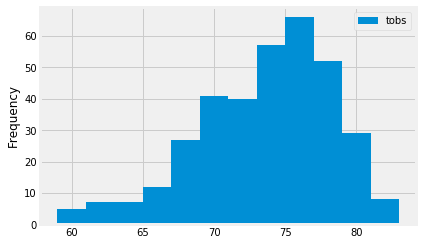

In [15]:
# Choose the station with the highest number of temperature observations.
tobs_results = session.query(Measurement.tobs)\
            .filter(Measurement.date.in_(str_dates))\
            .filter(Measurement.station == top_station)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = []
for row in tobs_results:
    tobs_data.append(row[0])
    
plt.hist(tobs_data, bins=12, label='tobs')
plt.ylabel("Frequency")
plt.legend()
plt.savefig("Images/Station.png")
plt.show
    

## Optional Challenge Assignment